# Info 370 HW 02:  Data manipulations (Pandas)

Name: Ella Kim   

*Citations are hyperlinked*

## Data import and summary
#### 1 
Load the data  
Do basic sanity checks:  
(a) How many variables (columns) is there in the data? Ensure you know the variables in the
data. Keep the documentation nearby.  
(b) How many rows of data is there?  
(c) Print the first few lines of data. Does it look reasonable?  


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
os.getcwd()
df_gapminder = pd.read_csv('/home/jovyan/lost+found/INFO_370/gapminder.csv.bz2', sep = "\t")
df_gapminder_save = df_gapminder[~df_gapminder.GDP_PC.isnull()]
df_gapminder_save = df_gapminder_save[~df_gapminder_save.lifeExpectancy.isnull()]
df_gapminder_save = df_gapminder_save[~df_gapminder_save.childMortality.isnull()]
countries = ['Equatorial Guinea', 'Luxembourg', 'Bosnia and Herzegovina', 'Ethiopia']
df_gapminder_s = df_gapminder_save[df_gapminder_save['name'].isin(countries)]
df_gapminder_save.to_csv('gapminder.csv')


In [38]:
# A 
cols = df_gapminder.shape[1]
print("Number of columns: " + str(cols))
# B
rows = df_gapminder.shape[0]
print("Number of rows: " + str(rows))
# C 
df_gapminder.head(5)
df_nulls = df_gapminder.isnull().sum()
#print(df_nulls) # to keep note that there are nulls in all columns except ISO3

Number of columns: 18
Number of rows: 13055


Part C: yes, it does seem reasonable. The values for each column match what the directory describes it to be; I can already observe NaN values in cells, such as childMortality

## Wealth

*For the results, I print out the results with numbers for the corresponding question*

#### 1 
How many different countries are there in the data?

In [39]:
list_unique = df_gapminder.name.unique() #decided to use name since used in future problems, and some iso3 have null names
list_unique #check
print("Number of unique countries:" + str(len(list_unique)))
# 250

Number of unique countries:250


#### 2
What is the earliest and the most recent year in the dataset?

In [40]:
year_sort = sorted(df_gapminder.time)
year_sort #check
print("Earliest year: " + str(year_sort[0]))
print("Most recent year: " + str(year_sort[len(year_sort)-1]))

Earliest year: 1960.0
Most recent year: 2019.0


##### Now let’s define wealth as GDP per capita and let’s explore countries by average wealth.

#### 3
For which year do we have the most recent GDP data?  
Hint: You can remove all missing GDP data to answer this question

In [41]:
list_vars = ["GDP_PC", "time"]
df_select_vars = df_gapminder[list_vars]
year_GDP = df_select_vars[~df_select_vars.isnull()]
list_noNA = df_gapminder.GDP_PC[~df_gapminder.GDP_PC.isnull()]
#print(list_noNA)
print(year_GDP)

           GDP_PC    time
0             NaN  1960.0
1             NaN  1961.0
2             NaN  1962.0
3             NaN  1963.0
4             NaN  1964.0
...           ...     ...
13050  1234.10335  2015.0
13051  1224.30992  2016.0
13052  1263.32132  2017.0
13053  1305.78329  2018.0
13054  1183.09882  2019.0

[13055 rows x 2 columns]


As 2019 was proven as the most recent year, 2019 has a GDP value that is not null and therefore: 2019

#### 4
 What is the average wealth on this planet as of 2019? Let’s just compute average GDP across
all countries for 2019 and ignore the fact that countries are of different size.

[Citation for gdp_2019](https://stackoverflow.com/questions/59675687/pandas-get-cell-value-by-row-number-not-row-index-and-column-name)

In [42]:
df_year = df_select_vars.groupby("time").mean()
df_year #check
gdp_2019 = df_year['GDP_PC'].iloc[len(df_year)-1]
print("Average wealth in 2019: " + str(gdp_2019))

Average wealth in 2019: 15055.352217243239


#### 5
But not all countries may have this final year. Which 5 countries countries have most recent
years missing? Till which year do they have data?  

Hint: you may group by country and find max value for the year. In the resulting series, find the
min/max. Check out the nlargest method.

In [43]:
max_year = df_gapminder[df_gapminder.GDP_PC.isna() == False].groupby("name").time.max()
print("Countries with most recent years missing (5): ")
print(max_year[max_year != 2019].head(5))

Countries with most recent years missing (5): 
name
American Samoa    2018.0
Aruba             2017.0
Cayman Islands    2018.0
Cuba              2018.0
Djibouti          2010.0
Name: time, dtype: float64


#### 6
 Now let’s compare the continents. We’ll do it easy again and just compute the average wealth
(i.e. GDP) for each continent in 2019, and we use region as continent. We disregard the fact that
countries are of different size. Print the continents, and the corresponding GDP in a decreasing
order.  

Remember to use only the most recent data!  

Hint: check out methods groupby and sort_values.

In [44]:
df_filter_2019 = df_gapminder[df_gapminder.time == 2019]
average_gdp_continent = df_filter_2019.groupby("region").mean()
sorted_gdp_continent = average_gdp_continent.GDP_PC.sort_values(ascending = False)
print("Continents and their GDPs: ")
print(sorted_gdp_continent)

Continents and their GDPs: 
region
Europe      33227.983767
Americas    14516.826303
Asia        14116.124163
Oceania     11817.735554
Africa       2765.708956
Name: GDP_PC, dtype: float64


#### 7
 But this was just about the average numbers. Now for each continent let’s also find the richest
and poorest country, the corresponding GDP, and population (for 2019). Print these in a readable
form.  

Note: While this gives a hint about inequality, we still completely ignore the intra-county inequality.
Quite likely the rich in the poor countries earn more than the poor in the rich countries. But these
measures unfortunately do not let us to assess this.  

Hint: while you can extract the values using construct like data.gdp == data.gdp.min(), you
may also check out methods idxmin and idxmax. If this seems overwhelming, then just loop over
continents, and for each continent find the richest and poorest country as of 2019 (check out methods
nlargest and nsmallest).
 
[Citation for loop](https://pandas.pydata.org/docs/reference/api/pandas.Series.iteritems.html)

In [45]:
max_gdp = df_gapminder[df_gapminder.GDP_PC.isna() == False].groupby("region").GDP_PC.max()

for index, value in max_gdp.items():
    loc_row_max = df_gapminder.loc[df_gapminder['GDP_PC'] == value]
    country = loc_row_max['name'].item()
    print("Richest Country in " + str(index) + ": " + str(country))
    print("GDP: " + str(loc_row_max['GDP_PC'].item()))
    get_country = df_gapminder[df_gapminder.name == country]
    print("Population: " + str(get_country.totalPopulation[get_country.time == 2019.0].item()))
    print()
    
min_gdp = df_gapminder[df_gapminder.GDP_PC.isna() == False].groupby("region").GDP_PC.min()

for index, value in min_gdp.items():
    loc_row_min = df_gapminder.loc[df_gapminder['GDP_PC'] == value]
    country = loc_row_min['name'].item()
    print("Poorest Country in " + str(index) + ": " + str(country))
    print("GDP: " + str(loc_row_min['GDP_PC'].item()))
    get_country = df_gapminder[df_gapminder.name == country]
    print("Population: " + str(get_country.totalPopulation[get_country.time == 2019.0].item()))
    print()

Richest Country in Africa: Equatorial Guinea
GDP: 20532.95226
Population: 1355986.0

Richest Country in Americas: Bermuda
GDP: 113236.09091
Population: 64027.0

Richest Country in Asia: United Arab Emirates
GDP: 116232.75298
Population: 9770529.0

Richest Country in Europe: Monaco
GDP: 196061.41684
Population: 38964.0

Richest Country in Oceania: Australia
GDP: 57183.37935
Population: 25365745.0

Poorest Country in Africa: Ethiopia
GDP: 164.3366
Population: 112078730.0

Poorest Country in Americas: Bolivia (Plurinational State of)
GDP: 1005.40847
Population: 11513100.0

Poorest Country in Asia: China
GDP: 132.07761
Population: 1397715000.0

Poorest Country in Europe: Bosnia and Herzegovina
GDP: 700.70077
Population: 3301000.0

Poorest Country in Oceania: Papua New Guinea
GDP: 1012.44119
Population: 8776109.0



#### 8 
Comment the list of poorest and richest countries. What do you think about these lists. Did
you know that Bermuda is the richest country in Americas? Do you know why? Why do most of
the rich countries have small population?

In [46]:
#Richest in Africa: Equatorial Guinea
#Richest in Americas: Bermuda
#Richest in Asia: United Arab Emirates
#Richest in Europe: Monaco
#Richest in Oceania: Australia

#Poorest in Africa: Ethiopia
#Poorest in Americas: Bolivia (Plurinational State of)
#Poorest in Asia: China
#Poorest in Europe: Bosnia and Herzegovina
#Poorest in Oceania: Papua New Guinea

I did not know the richest country in the Americas was Bermuda. After talking to my sister, however, I found out that businesses desire to have residency or operations there. Austrailia and Ethiopua made sense to me, but China had me very surprised at first. However, if I were to think of it like my reasoning below, it would make sense that there are huge disparities within regions in China which would lower the GDP significantly.  
I believe that the richest countries tend to have smaller population because that gives a less of a chance to have variability, such as the US: because there is so many people over so large of land, with the nature of our states and state vs federal laws, it is very easy to find huge differences in income and capital even when comparing state to state in the US. 

## Health

Health is a complex concept, but fortunately we can proxy health with life expectancy (LE). It is a natural
index of health that has been measured rather well for a long time already.


#### 1 
For how many countries we do not have LE for 1960 and 2019?

In [47]:
max_year_LE = df_gapminder[df_gapminder.lifeExpectancy.isna() == False].groupby("name").time.max()
print("None for 2019:")
print(max_year_LE[max_year_LE != 2019].head())

min_year_LE = df_gapminder[df_gapminder.lifeExpectancy.isna() == False].groupby("name").time.min()
print("\nNone for 1960:")
print(min_year_LE[min_year_LE != 1960].head())

None for 2019:
name
Cayman Islands      2010.0
Dominica            2002.0
Greenland           2017.0
Marshall Islands    2000.0
Palau               2005.0
Name: time, dtype: float64

None for 1960:
name
Bermuda           1965.0
Cayman Islands    2010.0
Dominica          1982.0
Faroe Islands     1973.0
Greenland         1978.0
Name: time, dtype: float64


#### 2

 What is the lowest and highest LE in data? Which years/countries does this correspond?


In [48]:
highest_LE = df_gapminder[df_gapminder.lifeExpectancy == df_gapminder.lifeExpectancy.max()]
print("Highest LE: " + str(highest_LE.lifeExpectancy.item()))
print("Corresponding Year: " + str(int(highest_LE.time.item())))
print("Correpsonding Country: " + str(highest_LE.name.item()))
lowest_LE = df_gapminder[df_gapminder.lifeExpectancy == df_gapminder.lifeExpectancy.min()]
print("\nLowest LE: " + str(lowest_LE.lifeExpectancy.item()))
print("Corresponding Year: " + str(int(lowest_LE.time.item())))
print("Correpsonding Country: " + str(lowest_LE.name.item()))

Highest LE: 85.41707
Corresponding Year: 2012
Correpsonding Country: San Marino

Lowest LE: 18.907
Corresponding Year: 1977
Correpsonding Country: Cambodia


#### 3
 If you did this correctly, you notice that the shortest LE is less than 20 years. What historical
events does it correspond to? (You may consult e.g. Wikipedia).

Ans: When looking up Cambodia and 1977, it was in the middle of a periodic Cambodian genocide: it was easy to then explain the low life expectancy given the nature of what occurs during a genocide.

#### 4

 Find the country with longest and shortest LE for each continent.

[Cite join in if/else](https://www.geeksforgeeks.org/join-function-python/)

In [49]:
longest_LE = df_gapminder[df_gapminder.lifeExpectancy.isna() == False].groupby("region").lifeExpectancy.max()

for index, value in longest_LE.items():
    loc_row_longest = df_gapminder.loc[df_gapminder['lifeExpectancy'] == value]
    country = loc_row_longest['name'].item()
    print("Country with longest LE in " + str(index) + ": " + str(country))

print()
    
shortest_LE = df_gapminder[df_gapminder.lifeExpectancy.isna() == False].groupby("region").lifeExpectancy.min()

for index, value in shortest_LE.items():
    loc_row_shortest = df_gapminder.loc[df_gapminder['lifeExpectancy'] == value]
    if len(loc_row_shortest['name']) == 1:
        country = loc_row_shortest['name'].item()
    else:
        x = " & "
        country = x.join(loc_row_shortest['name'])
    print("Country with shortest LE in " + str(index) + ": " + str(country))

Country with longest LE in Africa: Algeria
Country with longest LE in Americas: Cayman Islands
Country with longest LE in Asia: Hong Kong
Country with longest LE in Europe: San Marino
Country with longest LE in Oceania: Australia

Country with shortest LE in Africa: Rwanda
Country with shortest LE in Americas: Haiti
Country with shortest LE in Asia: Cambodia
Country with shortest LE in Europe: Bosnia and Herzegovina & South Africa
Country with shortest LE in Oceania: Papua New Guinea


#### 5

Which countries had the fastest and slowest growth rate of LE? You can compute the growth
rate (pct per year) as  
g = 100 [(LE1/LE0)^(1/n)− 1]  
where LE0 is the life expectancy at the beginning of the period, LE1 is it at the end of the period,
and n is the length of the period in years.  

Hint: for each country, compute the first valid year of life expectancy, last valid year of life expectancy, and find their life expectancies for the corresponding years. If the result is a series, just
order it, if it is not a series, make it into a series and order it

*slowest growth is not the min (-), but the value closest to 0*

In [50]:
warnings.filterwarnings('ignore') #is this ok? would get "RuntimeWarning: divide by zero encountered in double_scalars"
def growth_rate(le_0, le_1, n):
    return (100.0*(((le_1/le_0)**(1.0/n))-1.0))

longest_year_country = df_gapminder[df_gapminder.lifeExpectancy.isna() == False].groupby("name").time.max()
shortest_year_country = df_gapminder[df_gapminder.lifeExpectancy.isna() == False].groupby("name").time.min()

dict_growth_rate = {}

for country, value in longest_year_country.items(): 
    country_year_longest = longest_year_country[country]
    country_year_shortest = shortest_year_country[country]
    n = country_year_longest - country_year_shortest
    filter_country = df_gapminder[df_gapminder.name == country]
    country_early_LE = filter_country.lifeExpectancy[filter_country.time == country_year_shortest]
    country_late_LE = filter_country.lifeExpectancy[filter_country.time == country_year_longest]
    dict_growth_rate[country] =  growth_rate(country_early_LE.item(), country_late_LE.item(), n)  
    
series_growth_rate = pd.Series(dict_growth_rate)
print(series_growth_rate.sort_values(ascending = True))

short_countr = str(min(dict_growth_rate, key=dict_growth_rate.get))
long_countr = str(max(dict_growth_rate, key=dict_growth_rate.get))

print("\nSlowest growth rate: " + short_countr) 
print("Fastest growth rate: " + long_countr)

Marshall Islands   -0.770640
Cayman Islands      0.000000
San Marino          0.000000
Palau               0.005789
Ukraine             0.085396
                      ...   
Timor-Leste         1.232786
Bhutan              1.248151
Mali                1.268013
Maldives            1.276385
Yemen               1.353232
Length: 204, dtype: float64

Slowest growth rate: Marshall Islands
Fastest growth rate: Yemen


#### 6
 Do you see a pattern (or multiple patterns) here? Remember: you are looking at growth of
life expectancy over an extended period.

In [51]:
dict_large = {}
for key, value in dict_growth_rate.items():
    if value > 1:
        dict_large[key] = value
print("\nCountries with large rates (>1): \n")
for key in dict_large:
    print(key)

dict_small = {}
for key, value in dict_growth_rate.items():
    if value < .2:
        dict_small[key] = value
print("\nCountries with small rates (<.2): \n")
for key in dict_small:
    print(key)


Countries with large rates (>1): 

Afghanistan
Bhutan
Gambia
Liberia
Maldives
Mali
Nepal
Oman
South Sudan
Timor-Leste
Tunisia
Yemen

Countries with small rates (<.2): 

Belarus
Bulgaria
Cayman Islands
Czechia
Denmark
Fiji
Hungary
Iceland
Latvia
Lithuania
Marshall Islands
Netherlands
Palau
Russian Federation
San Marino
Seychelles
Slovakia
Ukraine


Patterns: most of the large rates of growth occur in Eurasia, while the smaller rates occur in Europe speficially or in island countries

#### 7
 Now pick the top and bottom countries in terms of life expectancy growth you identified above,
and make a plot where you show how life expectancy has changed over time in these two countries.

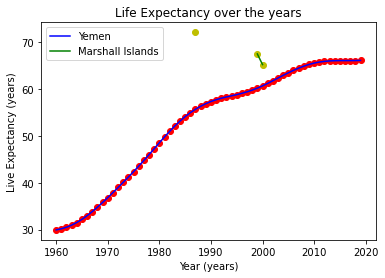

In [52]:
shortest_min_year = shortest_year_country[short_countr]
shortest_max_year = longest_year_country[short_countr]
longest_min_year = shortest_year_country[long_countr]
longest_max_year = longest_year_country[long_countr]

def get_y(country, year_min, year_max):
    y = []
    filter_country = df_gapminder[df_gapminder.name == country]
    for year in range(int(year_min), int(year_max)+1):
        get_le = filter_country.lifeExpectancy[filter_country.time == year]
        y.append(get_le)
    return y

y_1 = get_y(short_countr, shortest_min_year, shortest_max_year)
y_2 = get_y(long_countr, longest_min_year, longest_max_year)

x_1 = list(range(1987, 2001))
x_2= list(range(1960, 2020))
plt.scatter(x_2,y_2, color = 'r') 
plt.plot(x_2,y_2, color = 'b') 
plt.scatter(x_1,y_1, color = 'y') 
plt.plot(x_1,y_1, color = 'g') 
plt.xlabel("Year (years)")
plt.ylabel("Live Expectancy (years)")
plt.title("Life Expectancy over the years")
plt.legend({short_countr,long_countr})
plt.show()

At first I had the slowest to be the two countries that have 0 growth, both because they only had one value for life expectancy. However, I realized that would not say much (when Marshal Islands already had so little data as well). It would also make sense to agrue that, though comparing with magnitude, it is not the smallest, it is the slowest to grow as it is actually shrinking.  

Marshall Islands decreasing could be beacuse of health issues as cited in the insturctions and Wikipedia, but also because of [U.S. nuclear weapon testing on the islands, Dengue fever outbreaks, and hard to access health care.](https://borgenproject.org/life-expectancy-in-the-marshall-islands/) As for Yemen, organizations like [IRC, YRRF and other NGO](https://borgenproject.org/10-facts-about-life-expectancy-in-yemen/) contributed positive change in schools, medical treatment, nutrition/malnutrition, etc.

## Gender Disparities 

#### 1

How many valid male/female youth literacy rate values do we have? How many are missing?

*Same missing and valid counts for female and male, confirming that the values come as pairs*

In [53]:
valid_lit_f = df_gapminder[df_gapminder.youthFemaleLiteracy.isna() == False]
valid_lit_m = df_gapminder[df_gapminder.youthMaleLiteracy.isna() == False]
nulls_f = df_gapminder.youthFemaleLiteracy.isnull().sum()
nulls_m = df_gapminder.youthMaleLiteracy.isnull().sum()
print("# missing for females: " + str(nulls_f))
print("# missing for males: " + str(nulls_m))
print("# valid for females: " + str(len(valid_lit_f)))
print("# valid for males: " + str(len(valid_lit_m)))

# missing for females: 12134
# missing for males: 12134
# valid for females: 921
# valid for males: 921


#### 2

 How many missing cases do we have by year? How does the data quality change over years?
Make plot to demonstrate this!

Hint: you can get this done using .apply method, but if you feel this overwhelming use loops:
create an empty list, loop over all years, and for each year filter the data and add the number of
missings to the list.


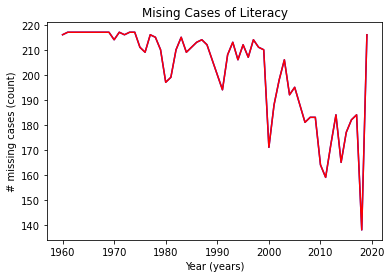

In [54]:
x = list(range(1960, 2020))
y_f = [];
y_m = [];
for year in range(1960, 2020):
    df_filter_year = df_gapminder[df_gapminder.time == year]
    count_null_f = df_filter_year.youthFemaleLiteracy.isnull().sum()
    count_null_m = df_filter_year.youthMaleLiteracy.isnull().sum()
    y_f.append(count_null_f)
    y_m.append(count_null_m)
    
plt.plot(x,y_f, color = 'b') 
plt.plot(x,y_m, color = 'r') 
plt.xlabel("Year (years)")
plt.ylabel("# missing cases (count)")
plt.title("Mising Cases of Literacy")
plt.show()

As seen from the graph and list printed (in order from 1960-2019), the same # missing is the same for female and male. Over time, the number of missing cases decreases with some spikes here and there (with the expection of a huge one at 2019). This would reflect the greater accessability we have to such data with technology. 

#### 3

How has the world gender disparity developed through years? This time compute the weighted
average where weights are the corresponding total population size (well, should use the corresponding
gender/age group size but let’s stay simple).  

Hint: you can do it like this:  
(a) Select only cases where literacy data is not missing  
(b) For each year, compute the total world population (you can just add new variables to the data
frame).  
(c) For each country-year (i.e. each observation), compute the country population times literacy
for both males, females; and divide this by world population.  
(d) Now group the above by year and sum. This is the weighted average.  

[Cite making df from lists](https://stackoverflow.com/questions/30522724/take-multiple-lists-into-dataframe)

In [55]:
# A
lit_f_for_disp = valid_lit_f.sort_values('time') # from probelm 1 in this section
lit_m_for_disp = valid_lit_m.sort_values('time')
# B
total_pop_year = valid_lit_f.groupby("time").totalPopulation.sum()

# C
weighted_f = []
weighted_m = []
disp = []
lit_f = list(lit_f_for_disp.youthFemaleLiteracy)
lit_m = list(lit_m_for_disp.youthMaleLiteracy)
countr_pop = list(lit_f_for_disp.totalPopulation)
curr_year = list(lit_f_for_disp.time)
country = list(lit_f_for_disp.name)

for i in range(0, len(lit_f)):
    tot_pop = total_pop_year.get(key = curr_year[i])
    avg_f = (countr_pop[i]*lit_f[i])/tot_pop
    avg_m = (countr_pop[i]*lit_m[i])/tot_pop
    weighted_f.append(avg_f)
    weighted_m.append(avg_m)
    disp.append(avg_m-avg_f)
    
df_weight_disp = pd.DataFrame(list(zip(curr_year, country, weighted_f, weighted_m, disp)),
               columns =['year', 'country', 'weightedFemale', 'weightedMale', 'disparity'])

# D
df_weight_disp_year = df_weight_disp.groupby('year').sum()

#### 4

 Make a plot that shows how has the disparity changed over time.

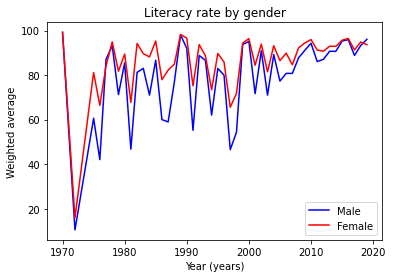

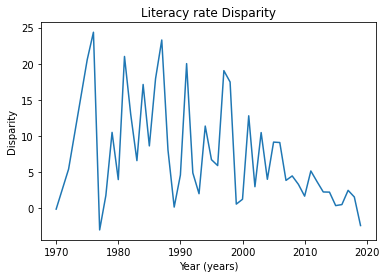

In [56]:
x_disp = (df_weight_disp_year.index.values.tolist())

plt.plot(x_disp,df_weight_disp_year.weightedFemale, color = 'b') # use x from previous section as it is the same axis
plt.plot(x_disp,df_weight_disp_year.weightedMale, color = 'r') # use x from previous section as it is the same axis
plt.xlabel("Year (years)")
plt.ylabel("Weighted average")
plt.title("Literacy rate by gender")
plt.legend({"Female","Male"})
plt.figure()
plt.plot(x_disp, df_weight_disp_year.disparity)
plt.xlabel("Year (years)")
plt.ylabel("Disparity")
plt.title("Literacy rate Disparity")
plt.show()

#### 5

 If your result is like mine, you see that the disparity is volatile, and fluctuating b/w 0 and 25
pct pt, mostly in favor of males. However, the trend is clearly downward.  
Does this result indicate that gender disparity is an issue that the world in recent years has mostly
overcome?

Ans: The results that are like the directions is the first plot, with two lines for each gender. The trned being clearly downwards is more obvious in the second plot, where it is the weighted averages subtracted (male-female). Although the issue is improving in recent years, with my own biased opinion I do not think it the issue has been overcome. There is still disparity present, and would most likely be very different if we were to split it up per country rather than a global average. 

#### 6

Find the countries with the disparity more than 5%, in favor of either boys or girls, as of 2018.
What are these places? Do you know why some of those are in this list?

[Cite apply](https://thispointer.com/pandas-apply-a-function-to-single-or-selected-columns-or-rows-in-dataframe/)

In [57]:
disp_2018 = df_weight_disp[df_weight_disp.year >= 2018]
abs_disp = disp_2018.apply(lambda x: np.abs(x) if x.name == 'disparity' else x)
countries_5_percent = abs_disp.country[abs_disp.disparity > 0.05]
print("Countries with more than 5% disparity for either boys or girls as of 2018: \n")
print(countries_5_percent)

Countries with more than 5% disparity for either boys or girls as of 2018: 

842          Nigeria
851      Afghanistan
867       Bangladesh
887            India
895             Mali
898            Niger
902    Côte d'Ivoire
920       Bangladesh
Name: country, dtype: object


Many of these countries are in Eurasia and have historically had general disparities in education for women and men (which still exist to an extent, which would explain why they are in 2018-2019). Because there is a direct relationship of literacy with education accessability/quality, that relationship would explain why such a disparity in the dataset.

#### 7
 What are the 10 countries with larges disparity in favor of girls?

In [58]:
country_women_favor = df_weight_disp[df_weight_disp.disparity < 0].sort_values('disparity', ascending = False)
print("Top 10 countries with disparities that favor women: \n")
print(country_women_favor.country.head(10))

Top 10 countries with disparities that favor women: 

666                                      Palau
463                        Palestine, State of
41                                       Palau
883                                      Tonga
546                                      Tonga
451    Korea (Democratic People's Republic of)
894                      Sao Tome and Principe
567                                      Macao
279                          Brunei Darussalam
600                                    Estonia
Name: country, dtype: object


## Time Spent: 

Over the course of two days: ~11 hours